Phase 1: Setup & Imports

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

# --- AUTOMATIC PATH FINDER ---
# This checks where your notebook is and finds the data
if os.path.exists('Training'):
    # Notebook is directly inside the data folder
    base_dir = Path('.')
    print("Path Found: Current Directory")
elif os.path.exists('Teeth_Dataset/Training'):
    # Notebook is one level up
    base_dir = Path('Teeth_Dataset') 
    print("Path Found: Teeth_Dataset/")
elif os.path.exists('Teeth DataSet/Teeth_Dataset/Training'):
    # Notebook is outside both folders
    base_dir = Path('Teeth DataSet/Teeth_Dataset')
    print("Path Found: Teeth DataSet/Teeth_Dataset/")
else:
    # Fallback: Print what files are actually next to the notebook to help debug
    print("ERROR: Could not find 'Training' folder.")
    print(f"I am currently looking in: {os.getcwd()}")
    print(f"Files here: {os.listdir()}")
    raise FileNotFoundError("Please move the notebook to the 'Teeth DataSet' folder.")

# Define paths based on the found base_dir
train_dir = base_dir / 'Training'
val_dir = base_dir / 'Validation'
test_dir = base_dir / 'Testing'

# Configuration
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
SEED = 42

print(f"Training dir set to: {train_dir}")

Path Found: Current Directory
Training dir set to: Training


### Phase 2: Data Analysis & Visualization

In [ ]:
# Define the exact 7 categories
MY_CLASSES = ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

# 1. Load Training Data
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    class_names=MY_CLASSES, 
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    seed=SEED
)

# 2. Load Validation Data
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    class_names=MY_CLASSES, 
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    seed=SEED
)

# 3. Load Test Data
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    class_names=MY_CLASSES,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False 
)

# --- NEW: Visualization of Distribution ---
def plot_dataset_distribution(directory, classes, title="Training Set Distribution"):
    counts = []
    for cls in classes:
        # Count the number of image files in each class folder
        class_path = os.path.join(directory, cls)
        count = len(os.listdir(class_path))
        counts.append(count)

    plt.figure(figsize=(12, 6))
    # Using the blue color from your reference image
    bars = plt.bar(classes, counts, color='#4a90e2', width=0.7)
    
    plt.title(title, fontsize=14, pad=15)
    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Add count labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 3,
                 f'{height}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# Execute the visualization
plot_dataset_distribution(train_dir, MY_CLASSES)

Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.


Phase 3: Data Loading & Preprocessing

Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.


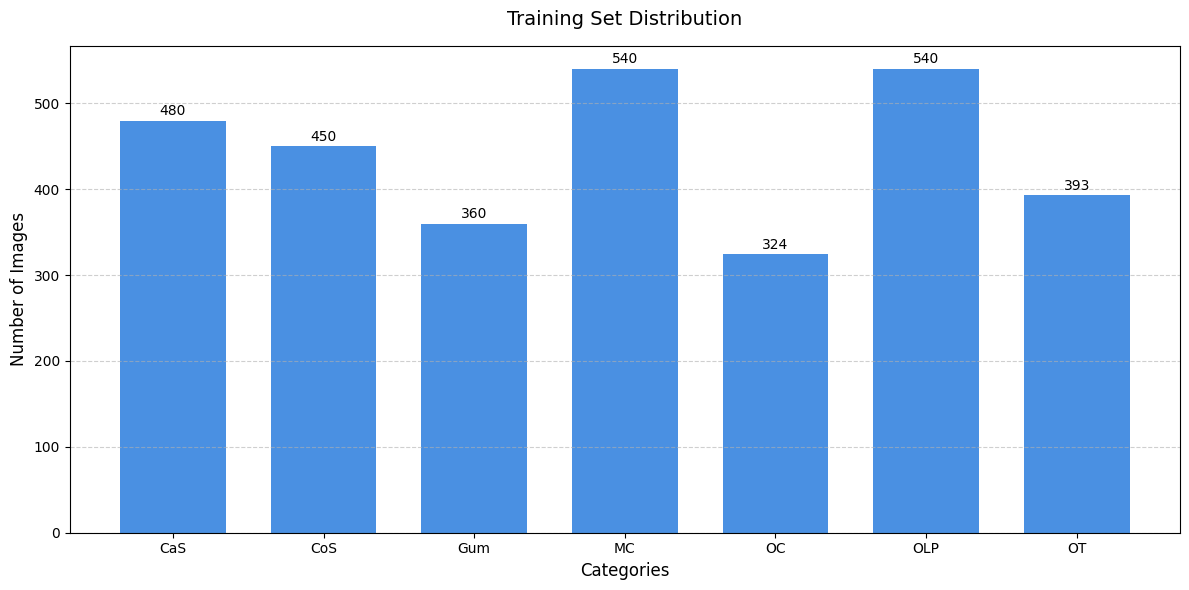

In [30]:
import matplotlib.pyplot as plt
import os

# --- Phase 2: Data Loading & Visualization ---

# Define the exact 7 categories
MY_CLASSES = ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

# 1. Load Training Data
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    class_names=MY_CLASSES, 
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    seed=SEED
)

# 2. Load Validation Data
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    class_names=MY_CLASSES, 
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    seed=SEED
)

# 3. Load Test Data
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    class_names=MY_CLASSES,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False 
)

# --- NEW: Visualization of Distribution ---
def plot_dataset_distribution(directory, classes, title="Training Set Distribution"):
    counts = []
    for cls in classes:
        # Count the number of image files in each class folder
        class_path = os.path.join(directory, cls)
        count = len(os.listdir(class_path))
        counts.append(count)

    plt.figure(figsize=(12, 6))
    # Using the blue color from your reference image
    bars = plt.bar(classes, counts, color='#4a90e2', width=0.7)
    
    plt.title(title, fontsize=14, pad=15)
    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Add count labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 3,
                 f'{height}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# Execute the visualization
plot_dataset_distribution(train_dir, MY_CLASSES)

Phase 4: Augmentation & Visualization

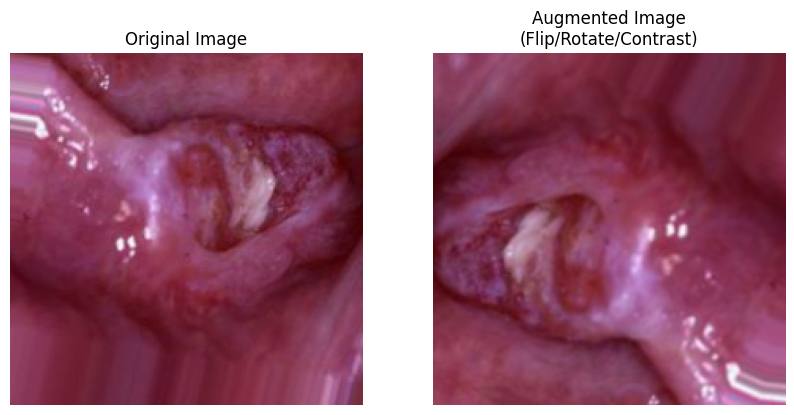

In [22]:
# Define Augmentation Layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1), # Important for inflammation redness
])

def visualize_augmentation(dataset):
    plt.figure(figsize=(10, 10))
    for images, _ in dataset.take(1):
        # Pick the first image from the batch
        original_img = images[0]
        
        # Show Original
        ax = plt.subplot(1, 2, 1)
        plt.imshow(original_img.numpy().astype("uint8"))
        plt.title("Original Image")
        plt.axis("off")
        
        # Show Augmented
        # We add a dimension because the model expects a batch (1, H, W, C)
        augmented_img = data_augmentation(tf.expand_dims(original_img, 0))
        
        ax = plt.subplot(1, 2, 2)
        plt.imshow(augmented_img[0].numpy().astype("uint8"))
        plt.title("Augmented Image\n(Flip/Rotate/Contrast)")
        plt.axis("off")
        
    plt.show()

# Run Visualization
visualize_augmentation(train_ds)

Phase 5: Building the Custom Model

In [23]:
def build_custom_model(num_classes):
    model = models.Sequential([
        # --- Preprocessing inside the model ---
        layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        data_augmentation, # Apply augmentation only during training
        layers.Rescaling(1./255), # Normalize pixel values to [0, 1]
        
        # --- Block 1: Edges & Colors ---
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(), # Stabilizes color learning
        layers.MaxPooling2D((2, 2)),
        
        # --- Block 2: Textures (Swelling/Ulcers) ---
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # --- Block 3: Complex Patterns ---
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # --- Block 4: High-Level Features ---
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        # --- Classifier Head ---
        layers.GlobalAveragePooling2D(), # More efficient than Flatten
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5), # Critical for small datasets
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

model = build_custom_model(len(class_names))

# Compile the Model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 456,903 (1.74 MB)

 Trainable params: 456,455 (1.74 MB)

 Non-trainable params: 448 (1.75 KB)

Phase 6: Training the Baseline

In [26]:
epochs = 30

# Callback to stop training if validation loss doesn't improve
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.5057 - loss: 1.2533 - val_accuracy: 0.4329 - val_loss: 1.5501
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.5157 - loss: 1.2290 - val_accuracy: 0.4611 - val_loss: 1.4372
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.5403 - loss: 1.1868 - val_accuracy: 0.3473 - val_loss: 2.2629
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.5526 - loss: 1.1702 - val_accuracy: 0.4232 - val_loss: 1.4948
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.5510 - loss: 1.1393 - val_accuracy: 0.4757 - val_loss: 1.6439
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.5837 - loss: 1.0627 - val_accuracy: 0.5749 - val_loss: 1.0630
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.5892 - loss: 1.0549 - val_accuracy: 0.5107 - val_loss: 1.3121
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.6009 - loss: 1.0398 - val_accuracy: 0.4504 - v

Phase 7: Evaluation & Result Visualization

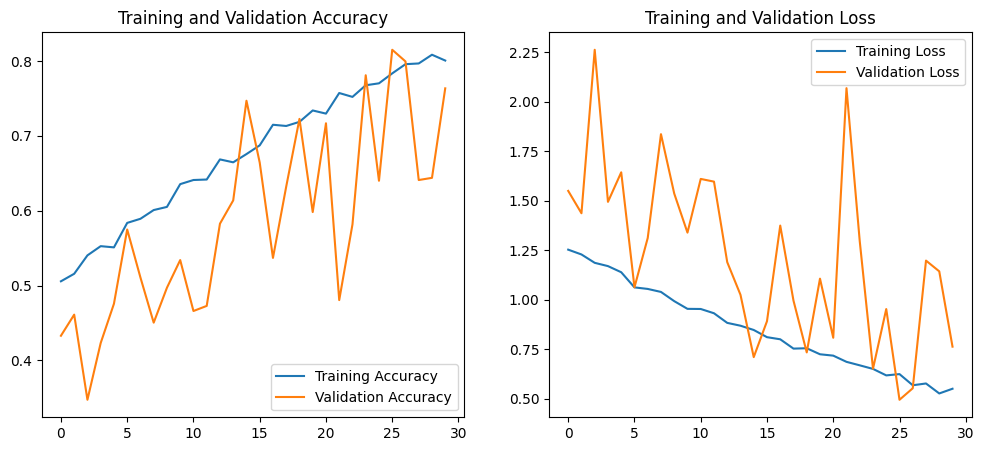

33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 0.8249 - loss: 0.4689

Baseline Test Accuracy: 82.49%


In [27]:
def plot_training_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_results(history)

# Final Evaluation on Test Set
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nBaseline Test Accuracy: {test_acc*100:.2f}%")